<a href="https://colab.research.google.com/github/bargida/AI_codes/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification Task
This notebook demonstrates the implementation of classification models (KNN, Logistic Regression, and Neural Networks) on the Heart Disease dataset. The steps include:
1. Data Preprocessing
2. Model Training and Evaluation
3. Performance Comparison


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import plotly.express as px

In [21]:
heart_data = pd.read_csv('heart_disease.csv')

In [22]:
heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [23]:
heart_data.shape

(920, 16)

In [24]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [25]:
fig = px.histogram(heart_data, x="age", color="sex")
fig.show()

In [26]:
print(heart_data['sex'].value_counts())
print(heart_data.groupby('sex')['age'].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64
sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64


In [27]:
numerical_data = heart_data.select_dtypes(include=['number'])

In [28]:
heart_data['trestbps'] = heart_data['trestbps'].fillna(heart_data['trestbps'].mean())
heart_data['chol'] = heart_data['chol'].fillna(heart_data['chol'].mean())
heart_data['thalch'] = heart_data['thalch'].fillna(heart_data['thalch'].mean())
heart_data['ca'] = heart_data['ca'].fillna(heart_data['ca'].mean())

# Fill missing values in categorical column with mode
heart_data['thal'] = heart_data['thal'].fillna(heart_data['thal'].mode()[0])

In [29]:
from sklearn.preprocessing import LabelEncoder
heart_data= heart_data.copy()
heart_data['sex'] = LabelEncoder().fit_transform(heart_data['sex'])

In [30]:
heart_data = pd.get_dummies(heart_data, columns=['cp', 'restecg', 'thal'], drop_first=True)

In [32]:
heart_data = heart_data.drop(columns=['id', 'dataset'])

In [33]:
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       830 non-null    object 
 5   thalch                    920 non-null    float64
 6   exang                     865 non-null    object 
 7   oldpeak                   858 non-null    float64
 8   slope                     611 non-null    object 
 9   ca                        920 non-null    float64
 10  num                       920 non-null    int64  
 11  cp_atypical angina        920 non-null    bool   
 12  cp_non-anginal            920 non-null    bool   
 13  cp_typical angina         920 non-null    bool   
 14  restecg_no

In [34]:
print(heart_data.head())

   age  sex  trestbps   chol    fbs  thalch  exang  oldpeak        slope   ca  \
0   63    1     145.0  233.0   True   150.0  False      2.3  downsloping  0.0   
1   67    1     160.0  286.0  False   108.0   True      1.5         flat  3.0   
2   67    1     120.0  229.0  False   129.0   True      2.6         flat  2.0   
3   37    1     130.0  250.0  False   187.0  False      3.5  downsloping  0.0   
4   41    0     130.0  204.0  False   172.0  False      1.4    upsloping  0.0   

   num  cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0    0               False           False               True           False   
1    2               False           False              False           False   
2    1               False           False              False           False   
3    0               False            True              False            True   
4    0                True           False              False           False   

   restecg_st-t abnormalit

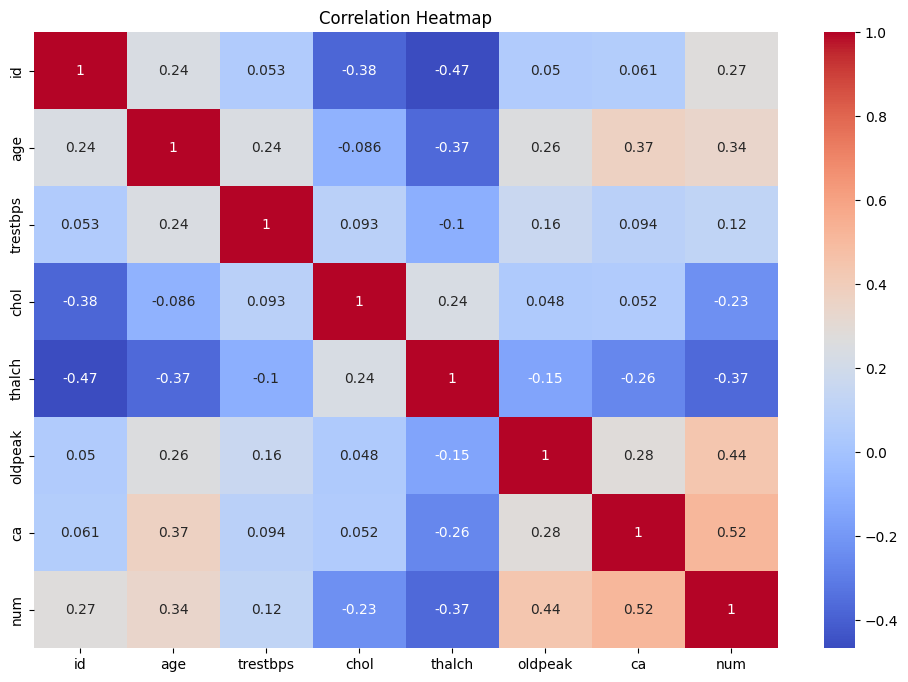

In [35]:
corr_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
print(heart_data.isnull().sum())

age                           0
sex                           0
trestbps                      0
chol                          0
fbs                          90
thalch                        0
exang                        55
oldpeak                      62
slope                       309
ca                            0
num                           0
cp_atypical angina            0
cp_non-anginal                0
cp_typical angina             0
restecg_normal                0
restecg_st-t abnormality      0
thal_normal                   0
thal_reversable defect        0
dtype: int64


In [37]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()


heart_data[numeric_cols] = scaler.fit_transform(heart_data[numeric_cols])

In [38]:
heart_data['target'] = (heart_data['num'] > 0).astype(int)

In [39]:
heart_data = heart_data.drop(columns=['num'])

In [40]:
numerical_cols = heart_data.select_dtypes(include=["float64", "int64"]).columns
heart_data[numerical_cols] = heart_data[numerical_cols].fillna(heart_data[numerical_cols].median())

In [41]:
categorical_cols = heart_data.select_dtypes(include=["object"]).columns
heart_data[categorical_cols] = heart_data[categorical_cols].fillna(heart_data[categorical_cols].mode().iloc[0])

<ipython-input-41-3b32853fe3c3>:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [48]:
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       918 non-null    float64
 1   sex                       918 non-null    int64  
 2   trestbps                  918 non-null    float64
 3   chol                      918 non-null    float64
 4   fbs                       918 non-null    bool   
 5   thalch                    918 non-null    float64
 6   exang                     918 non-null    bool   
 7   oldpeak                   918 non-null    float64
 8   slope                     918 non-null    object 
 9   ca                        918 non-null    float64
 10  cp_atypical angina        918 non-null    bool   
 11  cp_non-anginal            918 non-null    bool   
 12  cp_typical angina         918 non-null    bool   
 13  restecg_normal            918 non-null    bool   
 14  restecg_st-t ab

In [49]:
print(heart_data.head())

        age  sex  trestbps      chol    fbs    thalch  exang   oldpeak  \
0  1.007386    1  0.698041  0.311021   True  0.495698  False  1.303159   
1  1.432034    1  1.511761  0.797713  False -1.175955   True  0.569611   
2  1.432034    1 -0.658158  0.274289  False -0.340128   True  1.578239   
3 -1.752828    1 -0.115679  0.467130  False  1.968345  False  2.403480   
4 -1.328180    0 -0.115679  0.044717  False  1.371326  False  0.477918   

         slope   ca  cp_atypical angina  cp_non-anginal  cp_typical angina  \
0  downsloping  0.0               False           False               True   
1         flat  3.0               False           False              False   
2         flat  2.0               False           False              False   
3  downsloping  0.0               False            True              False   
4    upsloping  0.0                True           False              False   

   restecg_normal  restecg_st-t abnormality  thal_normal  \
0           False         

In [50]:
print(heart_data.isnull().sum())

age                         0
sex                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
slope                       0
ca                          0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
thal_normal                 0
thal_reversable defect      0
target                      0
dtype: int64


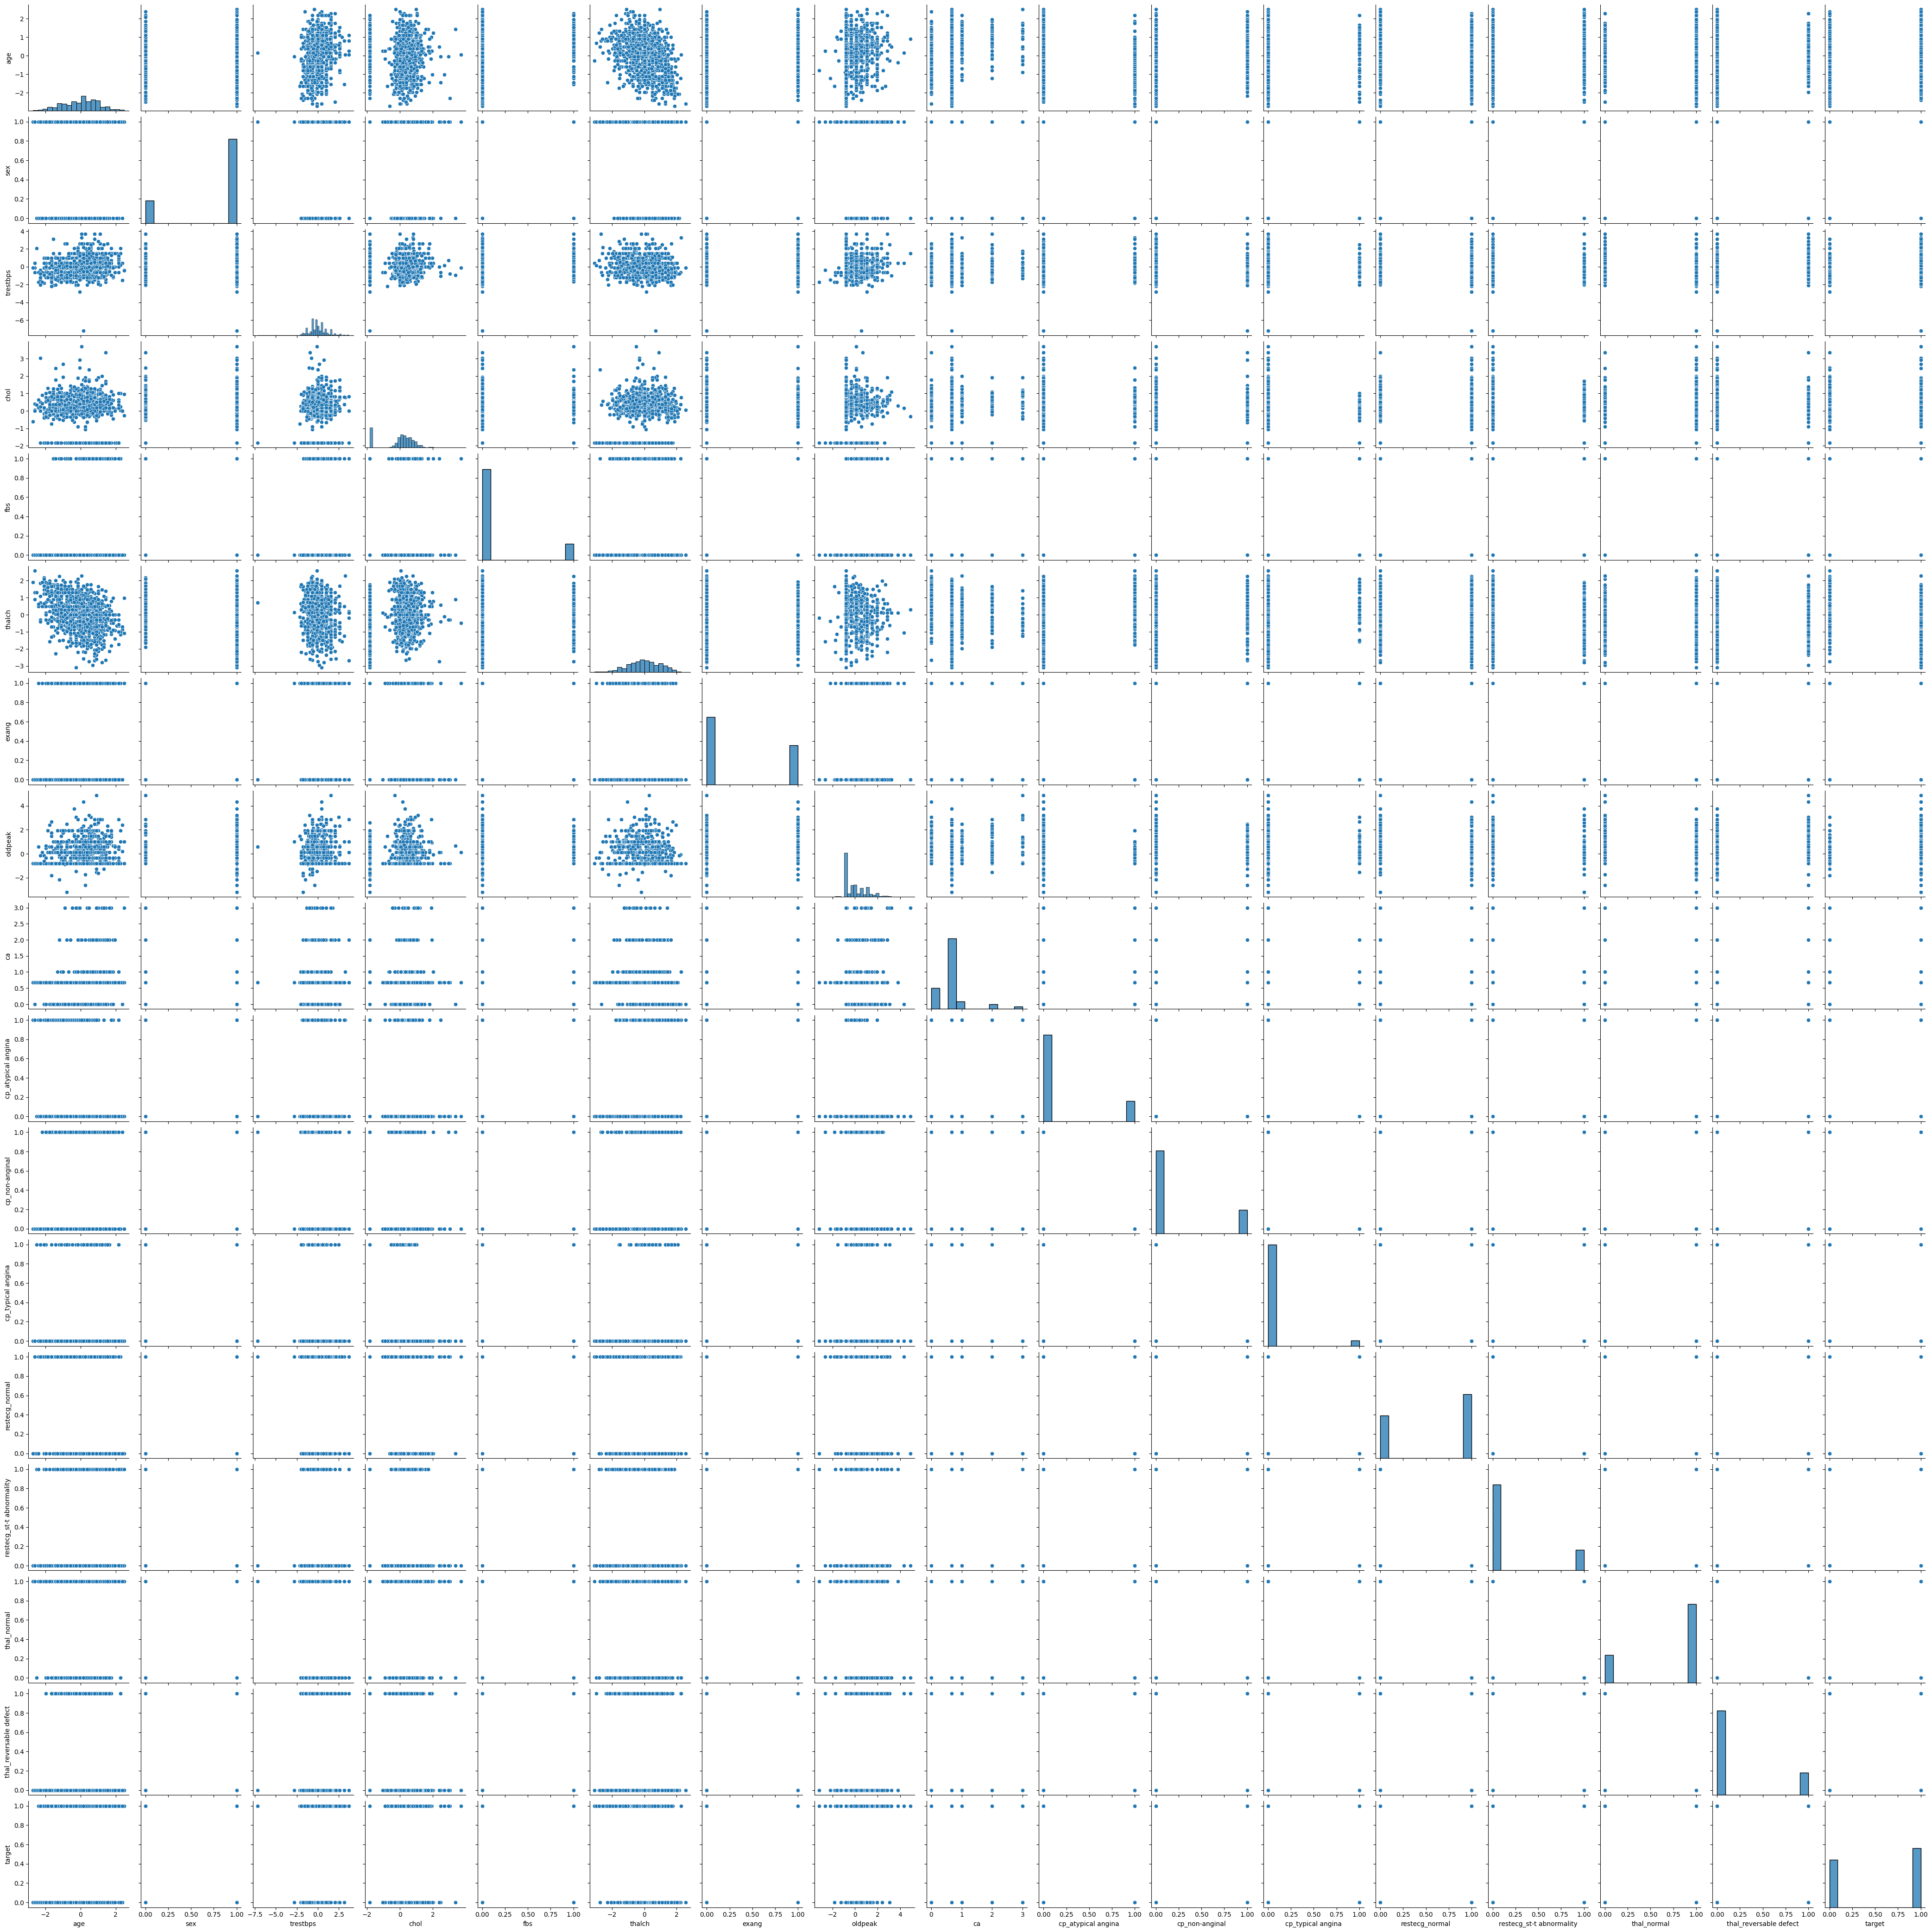

In [51]:
sns.pairplot(heart_data)

In [52]:
heart_data.drop_duplicates(inplace=True)

Defining our dataset in to independent variables and dependent variable:

In [521]:
# x=heart_data.iloc[:,1:-1]
# y=heart_data.iloc[:,-1]

Separate features and target variable

In [55]:
if 'num' in heart_data.columns:
    heart_data = heart_data.drop(columns=['num'])

x = heart_data.drop(columns=["target"])
y = heart_data["target"]

In [56]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_features = x.select_dtypes(include=['object']).columns

Select categorical features for encoding

In [57]:
x_categorical = x[categorical_features]
encoded_data = encoder.fit_transform(x_categorical)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features), index=x.index)

Select only numeric features for scaling

In [58]:
numeric_features = x.select_dtypes(include=np.number).columns
x_numeric = x[numeric_features]

Normalize numeric features using MinMaxScaler

In [59]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_numeric)
x_scaled = pd.DataFrame(x_scaled, columns=numeric_features, index=x.index)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

Create a new DataFrame with scaled numeric features

In [60]:
x_scaled = pd.DataFrame(x_scaled, columns=numeric_features, index=x.index)

Concatenate scaled numeric features and encoded categorical features

In [61]:
x_processed = pd.concat([x_scaled, encoded_df], axis=1)

In [62]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(x_processed, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



Split dataset into training and testing sets

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.20, random_state=67)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Evaluate Logistic Regression
y_pred_logistic = logistic_model.predict(x_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71        96
           1       0.74      0.75      0.75       108

    accuracy                           0.73       204
   macro avg       0.73      0.73      0.73       204
weighted avg       0.73      0.73      0.73       204

Confusion Matrix:
[[68 28]
 [27 81]]



 train KNN model:

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=22,
    n_jobs=-1
)
random_search_rf.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=22, scoring='accuracy')

In [68]:
best_rf = random_search_rf.best_estimator_
rf_predictions = best_rf.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


Accuracy: 0.7794117647058824
Confusion Matrix:
[[74 22]
 [23 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        96
           1       0.79      0.79      0.79       108

    accuracy                           0.78       204
   macro avg       0.78      0.78      0.78       204
weighted avg       0.78      0.78      0.78       204



KNN model 2:

In [69]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=22,
    n_jobs=-1
)


In [70]:
random_search_rf.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=22, scoring='accuracy')

In [73]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
nn_model = Sequential()
nn_model.compile(optimizer=Adam(learning_rate=0.001), \
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model here, after it's defined
nn_model.compile(optimizer=Adam(learning_rate=0.001),  # Reduce learning rate
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [78]:
knn_model1 = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
knn_predictions1 = knn_model.predict(x_test)

In [79]:
best_rf = random_search_rf.best_estimator_
print(f"Best Parameters: {random_search_rf.best_params_}")

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}


In [80]:
rf_predictions1 = best_rf.predict(x_test)
accuracy_rf1 = accuracy_score(y_test, rf_predictions1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [81]:
print(f"Accuracy: {accuracy_rf1}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions1))
print("Classification Report:")
print(classification_report(y_test, rf_predictions1))

Accuracy: 0.7058823529411765
Confusion Matrix:
[[51 45]
 [15 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.53      0.63        96
           1       0.67      0.86      0.76       108

    accuracy                           0.71       204
   macro avg       0.72      0.70      0.69       204
weighted avg       0.72      0.71      0.70       204



Logistic Regression

In [82]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predict=lr.predict(x_test)


In [83]:
print(f"Accuracy: {accuracy_rf1, }")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predict))
print("Classification Report:")
print(classification_report(y_test, predict))

Accuracy: (0.7058823529411765,)
Confusion Matrix:
[[71 25]
 [25 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        96
           1       0.77      0.77      0.77       108

    accuracy                           0.75       204
   macro avg       0.75      0.75      0.75       204
weighted avg       0.75      0.75      0.75       204



Neural Network Model

In [84]:
import tensorflow as tf
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=5)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(15, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(5, activation=tf.nn.softmax))

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelMetrics = model.fit(x_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3110 - loss: 1.5103   
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4875 - loss: 1.3571  
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5748 - loss: 1.1883 
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6309 - loss: 1.0530 
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6965 - loss: 0.9439 
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7164 - loss: 0.8473 
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7509 - loss: 0.7441 
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7641 - loss: 0.6754 
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7354 - loss: 0.6472 
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7496 - loss: 0.5999 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7585 - loss: 0.5755 
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [86]:
val_loss, val_acc = model.evaluate(x_test,y_test.values)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7446 - loss: 0.5461  
